CNN  
#Data Augmentaion

이미지 데이터 증강 (Data Augmentation)을 통한 성능 개선

Keras의 ImageDataGenerator를 사용하여 CIFAR-10 데이터셋에 대한 데이터 증강을 적용하는 프로그램을 구현해보세요.

회전, 확대, 이동 등 다양한 증강 기법을 적용해보고, 데이터 증강이 모델의 성능에 어떤 영향을 미치는지 분석 결과를 정리해보세요.

In [27]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator # data augmentation

# CIFAR-10 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [28]:
# 트레이닝 데이터 Augmentation
train_datagen = ImageDataGenerator(rotation_range=20, # 기울이기
                                  zoom_range=0.2, # zoom
                                  width_shift_range=0.1,
                                  height_shift_range=0.1, # 수직적 스크롤
                                  horizontal_flip=True, # Symmerty in Horizontal
                                  fill_mode='nearest') # input 경계 바깥 공간 디퐅트 패딩
train_datagen.fit(train_images)

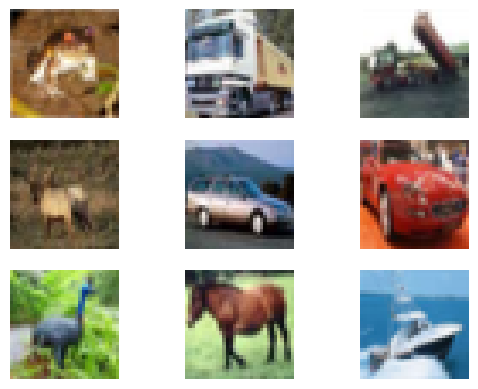

In [31]:
# 원본 이미지 표시
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i])
    plt.axis("off")
plt.show()

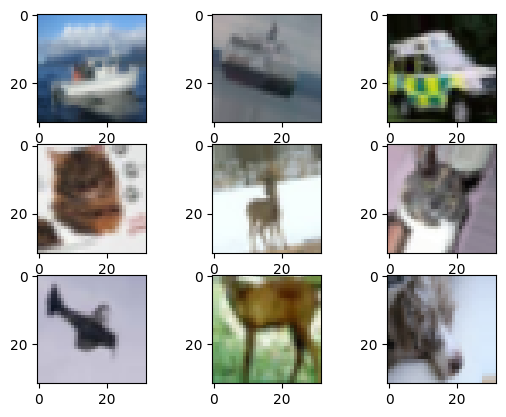

In [32]:
# 데이터 증강을 적용한 이미지 표시
for X_batch, y_batch in train_datagen.flow(train_images, train_labels, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].astype(np.uint8))
    plt.show()
    break

In [33]:
# 데이터 정규화
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

In [45]:
# CNN 모델 구축
model = Sequential([
    Conv2D(16, (3, 3), activation=tf.nn.leaky_relu, input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation=tf.nn.leaky_relu),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation=tf.nn.leaky_relu),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation=tf.nn.leaky_relu),
    Flatten(),
    Dense(256,activation=tf.nn.leaky_relu),
    Dropout(0.4),
    Dense(64, activation=tf.nn.leaky_relu),
    Dense(10)
])

# 모델 컴파일
model.compile(optimizer='nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 모델 요약 출력
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 4, 4, 128)        

Epoch 1/10


<ipython-input-40-32436d22793f>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen.flow(train_images, train_labels, batch_size=128),


390/390 [==============================] - 31s 76ms/step - loss: 0.8640 - accuracy: 0.7044 - val_loss: 0.6785 - val_accuracy: 0.7726
Epoch 2/10
390/390 [==============================] - 29s 75ms/step - loss: 0.7940 - accuracy: 0.7260 - val_loss: 0.6727 - val_accuracy: 0.7739
Epoch 3/10
390/390 [==============================] - 28s 73ms/step - loss: 0.7696 - accuracy: 0.7320 - val_loss: 0.6639 - val_accuracy: 0.7787
Epoch 4/10
390/390 [==============================] - 29s 74ms/step - loss: 0.7520 - accuracy: 0.7401 - val_loss: 0.6422 - val_accuracy: 0.7839
Epoch 5/10
390/390 [==============================] - 28s 71ms/step - loss: 0.7419 - accuracy: 0.7418 - val_loss: 0.6098 - val_accuracy: 0.7930
Epoch 6/10
390/390 [==============================] - 28s 72ms/step - loss: 0.7300 - accuracy: 0.7478 - val_loss: 0.6346 - val_accuracy: 0.7856
Epoch 7/10
390/390 [==============================] - 29s 74ms/step - loss: 0.7162 - accuracy: 0.7529 - val_loss: 0.6109 - val_accuracy: 0.7939
Epo

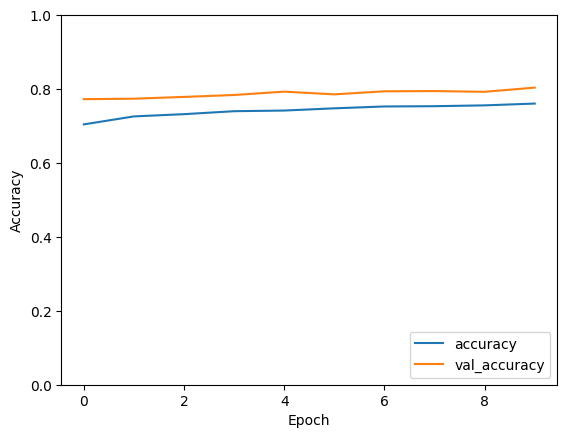

313/313 - 1s - loss: 0.5897 - accuracy: 0.8039 - 794ms/epoch - 3ms/step

Test accuracy: 0.8039000034332275


In [40]:
# 모델 학습
history = model.fit_generator(train_datagen.flow(train_images, train_labels, batch_size=128),
                       steps_per_epoch = len(train_images) / 128, epochs=10, validation_data=(test_images, test_labels))

# 학습 결과 시각화
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# 모델 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

1/1 [==============================] - 0s 21ms/step


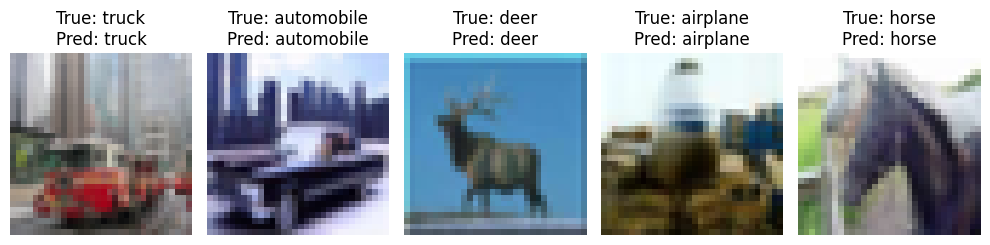

In [42]:
# 예측 결과 확인하기

# 클래스 이름
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 테스트 데이터셋에서 임의의 이미지 몇 개를 선택
num_images = 5
random_indices = np.random.choice(test_images.shape[0], num_images, replace=False)
selected_images = test_images[random_indices]
selected_labels = test_labels[random_indices]

# 모델을 사용하여 예측
predictions = model.predict(selected_images)

# 이미지와 예측 결과 출력
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(selected_images[i])
    plt.title(f"True: {class_names[selected_labels[i][0]]}\nPred: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

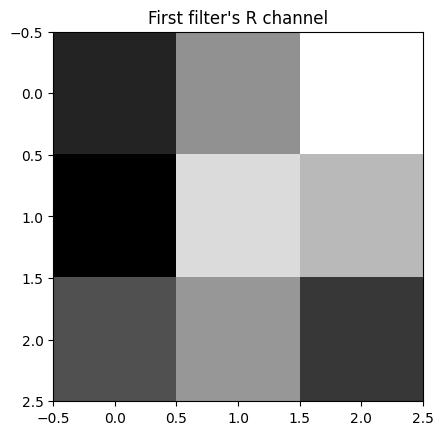

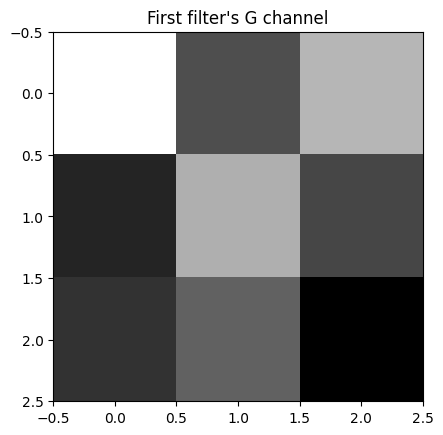

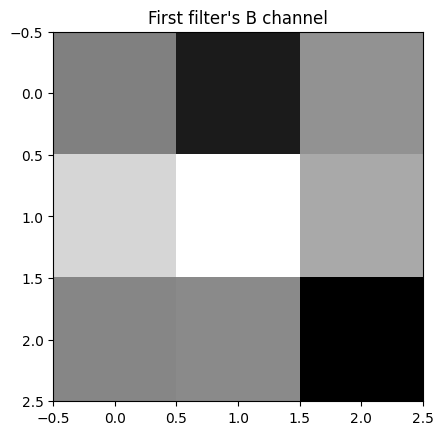

In [43]:
# 첫 번째 Conv2D 층의 가중치 가져오기
weights = model.layers[0].get_weights()[0]

# 가중치의 shape: (filter_height, filter_width, input_depth, num_filters)
# 예를 들어, (3, 3, 3, 32)의 shape을 가진다면, 3x3 크기의 32개의 필터가 있음을 의미

# 첫 번째 필터의 첫 번째 채널 (R 채널) 시각화하기
plt.imshow(weights[:, :, 0, 0], cmap='gray')
plt.title("First filter's R channel")
plt.show()

# 첫 번째 필터의 두 번째 채널 (G 채널) 시각화하기
plt.imshow(weights[:, :, 1, 0], cmap='gray')
plt.title("First filter's G channel")
plt.show()

# 첫 번째 필터의 세 번째 채널 (B 채널) 시각화하기
plt.imshow(weights[:, :, 2, 0], cmap='gray')
plt.title("First filter's B channel")
plt.show()

#분석 결과

data augmentation이 있는 경우와 없는 경우를 비교했을 때 data augmentation의 test accuracy가 유의미하게 높았다.  
data augmentation 시 한정된 input data로부터 다양하게 증강된 data를 만들어 실질적인 학습 dataset의 규모를 키울 수 있기 때문에 노이즈에 대응하는 등 overfitting을 방지할 수 있다.

data augmentation 시  
Test accuracy: 0.8039000034332275

data augmentation 없을 때  
Test accuracy: 0.7651000022888184

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 16)        448       
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 4, 4, 128)         7

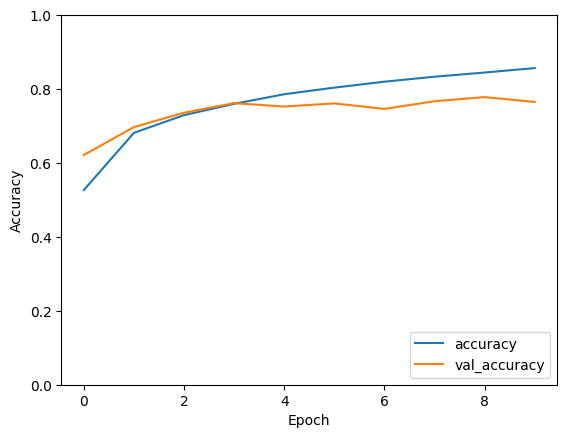

313/313 - 1s - loss: 0.7392 - accuracy: 0.7651 - 817ms/epoch - 3ms/step

Test accuracy: 0.7651000022888184


In [ ]:
# 필요한 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout

# CIFAR-10 데이터셋 로드
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# 데이터 정규화
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# CNN 모델 구축
model = Sequential([
    Conv2D(16, (3, 3), activation=tf.nn.leaky_relu, input_shape=(32, 32, 3)),
    Conv2D(32, (3, 3), activation=tf.nn.leaky_relu),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation=tf.nn.leaky_relu),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation=tf.nn.leaky_relu),
    Flatten(),
    Dense(256,activation=tf.nn.leaky_relu),
    Dropout(0.4),
    Dense(64, activation=tf.nn.leaky_relu),
    Dense(10)
])

# 모델 컴파일
model.compile(optimizer='nadam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 모델 요약 출력
model.summary()

# 모델 학습
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# 학습 결과 시각화
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# 모델 평가
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


1/1 [==============================] - 0s 21ms/step


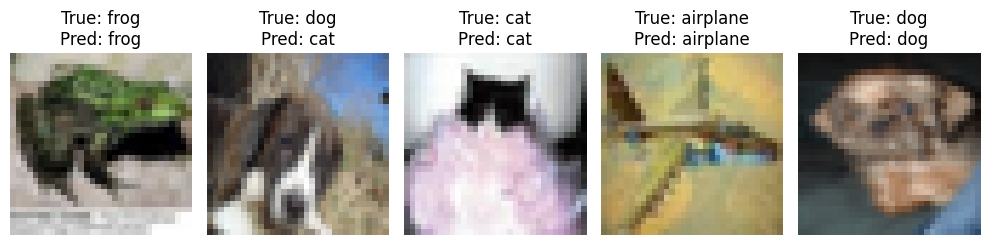

In [ ]:
# 예측 결과 확인하기

# 클래스 이름
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# 테스트 데이터셋에서 임의의 이미지 몇 개를 선택
num_images = 5
random_indices = np.random.choice(test_images.shape[0], num_images, replace=False)
selected_images = test_images[random_indices]
selected_labels = test_labels[random_indices]

# 모델을 사용하여 예측
predictions = model.predict(selected_images)

# 이미지와 예측 결과 출력
plt.figure(figsize=(10, 5))
for i in range(num_images):
    plt.subplot(1, num_images, i+1)
    plt.imshow(selected_images[i])
    plt.title(f"True: {class_names[selected_labels[i][0]]}\nPred: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

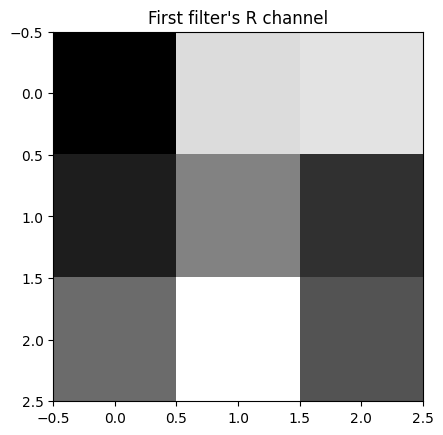

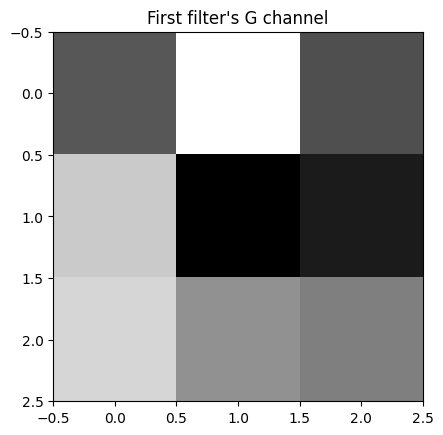

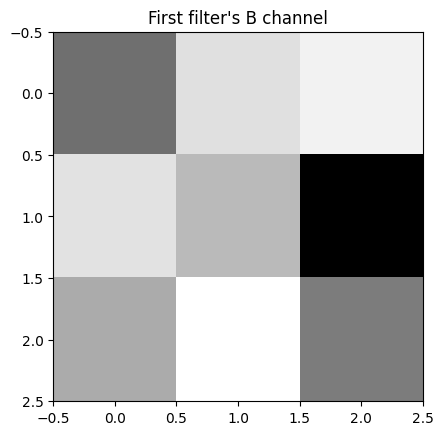

In [ ]:
# 첫 번째 Conv2D 층의 가중치 가져오기
weights = model.layers[0].get_weights()[0]

# 가중치의 shape: (filter_height, filter_width, input_depth, num_filters)
# 예를 들어, (3, 3, 3, 32)의 shape을 가진다면, 3x3 크기의 32개의 필터가 있음을 의미

# 첫 번째 필터의 첫 번째 채널 (R 채널) 시각화하기
plt.imshow(weights[:, :, 0, 0], cmap='gray')
plt.title("First filter's R channel")
plt.show()

# 첫 번째 필터의 두 번째 채널 (G 채널) 시각화하기
plt.imshow(weights[:, :, 1, 0], cmap='gray')
plt.title("First filter's G channel")
plt.show()

# 첫 번째 필터의 세 번째 채널 (B 채널) 시각화하기
plt.imshow(weights[:, :, 2, 0], cmap='gray')
plt.title("First filter's B channel")
plt.show()